In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
treino_colunas = {'Store': 'loja', 'Dept': 'Departamento', 'Date': 'Data', 'Weekly_Sales': 'Venda_Departamento', 'IsHoliday': 'Feriado'}
teste_colunas = {'Store': 'loja', 'Dept': 'Departamento', 'Date': 'Data', 'IsHoliday': 'Feriado'}
loja_colunas = {'Store': 'loja', 'Type': 'Tipo', 'Size': 'Tamanho'}
features_colunas = {'Store': 'loja', 'Date': 'Data', 'Temperature': 'Temperatura', 'Fuel_Price': 'Preço_Combustível',  'CPI': 'IPC', 'Unemployment': 'Desemprego','IsHoliday': 'Feriado'}

treino = pd.read_csv('train.csv').rename(columns=treino_colunas)
teste = pd.read_csv('test.csv').rename(columns=teste_colunas)
loja = pd.read_csv('stores.csv').rename(columns=loja_colunas)
feature = pd.read_csv('features.csv').rename(columns=features_colunas)


treino = treino.merge(loja)
teste = teste.merge(loja)
feature = feature.merge(loja)

treino = pd.get_dummies(treino, columns=['Tipo'])
teste = pd.get_dummies(teste, columns=['Tipo'])
feature = pd.get_dummies(feature, columns=['Tipo'])

tabelas = [treino, teste, feature]

def join (tabela, tabela_2):
        tabela = tabela.merge(tabela_2)
        return tabela   

def inteiro (tabela, filtro):
    for colunas in tabela.columns:
        if filtro in colunas:
            tabela[colunas] = tabela[colunas].astype(int)
    return tabela

for tabela in tabelas:
    join(tabela, loja)

for tabela in tabelas:
    inteiro(tabela, 'Feriado')

for tabela in tabelas:
    inteiro(tabela, 'Tipo_')

display(treino.head())
display(teste.head())
display(loja.head())
display(feature.head())

,loja,Departamento,Data,Venda_Departamento,Feriado,Tamanho,Tipo_A,Tipo_B,Tipo_C
0,1,1,2010-02-05,24924.50,0,151315,1,0,0
1,1,1,2010-02-12,46039.49,1,151315,1,0,0
2,1,1,2010-02-19,41595.55,0,151315,1,0,0
3,1,1,2010-02-26,19403.54,0,151315,1,0,0
4,1,1,2010-03-05,21827.90,0,151315,1,0,0


,loja,Departamento,Data,Feriado,Tamanho,Tipo_A,Tipo_B,Tipo_C
0,1,1,2012-11-02,0,151315,1,0,0
1,1,1,2012-11-09,0,151315,1,0,0
2,1,1,2012-11-16,0,151315,1,0,0
3,1,1,2012-11-23,1,151315,1,0,0
4,1,1,2012-11-30,0,151315,1,0,0


,loja,Tipo,Tamanho
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,loja,Data,Temperatura,Preço_Combustível,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IPC,Desemprego,Feriado,Tamanho,Tipo_A,Tipo_B,Tipo_C
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,1,0,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,151315,1,0,0
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,151315,1,0,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,151315,1,0,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,151315,1,0,0


In [3]:
print(feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loja               8190 non-null   int64  
 1   Data               8190 non-null   object 
 2   Temperatura        8190 non-null   float64
 3   Preço_Combustível  8190 non-null   float64
 4   MarkDown1          4032 non-null   float64
 5   MarkDown2          2921 non-null   float64
 6   MarkDown3          3613 non-null   float64
 7   MarkDown4          3464 non-null   float64
 8   MarkDown5          4050 non-null   float64
 9   IPC                7605 non-null   float64
 10  Desemprego         7605 non-null   float64
 11  Feriado            8190 non-null   int32  
 12  Tamanho            8190 non-null   int64  
 13  Tipo_A             8190 non-null   int32  
 14  Tipo_B             8190 non-null   int32  
 15  Tipo_C             8190 non-null   int32  
dtypes: float64(9), int32(4),

In [4]:
feature.fillna(0, inplace=True)
print(feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loja               8190 non-null   int64  
 1   Data               8190 non-null   object 
 2   Temperatura        8190 non-null   float64
 3   Preço_Combustível  8190 non-null   float64
 4   MarkDown1          8190 non-null   float64
 5   MarkDown2          8190 non-null   float64
 6   MarkDown3          8190 non-null   float64
 7   MarkDown4          8190 non-null   float64
 8   MarkDown5          8190 non-null   float64
 9   IPC                8190 non-null   float64
 10  Desemprego         8190 non-null   float64
 11  Feriado            8190 non-null   int32  
 12  Tamanho            8190 non-null   int64  
 13  Tipo_A             8190 non-null   int32  
 14  Tipo_B             8190 non-null   int32  
 15  Tipo_C             8190 non-null   int32  
dtypes: float64(9), int32(4),

In [5]:
treino['Mês'] = pd.to_datetime(treino['Data']).dt.month
teste['Mês'] = pd.to_datetime(teste['Data']).dt.month
feature['Mês'] = pd.to_datetime(feature['Data']).dt.month

treino['ano'] = pd.to_datetime(treino['Data']).dt.year
teste['ano'] = pd.to_datetime(teste['Data']).dt.year
feature['ano'] = pd.to_datetime(feature['Data']).dt.year

In [6]:
nova = treino.merge(feature)
test = teste.merge(feature)

display(nova)
display(test)

,loja,Departamento,Data,Venda_Departamento,Feriado,Tamanho,Tipo_A,Tipo_B,Tipo_C,Mês,ano,Temperatura,Preço_Combustível,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IPC,Desemprego
0,1,1,2010-02-05,24924.50,0,151315,1,0,0,2,2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,151315,1,0,0,2,2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,151315,1,0,0,2,2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,151315,1,0,0,2,2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,151315,1,0,0,3,2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,118221,0,1,0,9,2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,0,118221,0,1,0,10,2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,0,118221,0,1,0,10,2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,0,118221,0,1,0,10,2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


,loja,Departamento,Data,Feriado,Tamanho,Tipo_A,Tipo_B,Tipo_C,Mês,ano,Temperatura,Preço_Combustível,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IPC,Desemprego
0,1,1,2012-11-02,0,151315,1,0,0,11,2012,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,0,151315,1,0,0,11,2012,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,0,151315,1,0,0,11,2012,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,1,151315,1,0,0,11,2012,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,0,151315,1,0,0,11,2012,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,118221,0,1,0,6,2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000
115060,45,98,2013-07-05,0,118221,0,1,0,7,2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000
115061,45,98,2013-07-12,0,118221,0,1,0,7,2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000
115062,45,98,2013-07-19,0,118221,0,1,0,7,2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000


In [7]:
# Função para verificar dados faltantes
def check_missing_data(df):
    missing = df.isnull().sum()
    if missing.any():
        print(f"Dados faltantes:\n{missing[missing > 0]}")
    else:
        print("Sem dados faltantes.")

def weighted_mean_absolute_error(y_true, y_pred, weights):
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

# Seleção de features para o modelo
X = nova[['loja', 
          'Departamento', 
          'Temperatura',  
          'MarkDown1', 
          'MarkDown2', 
          'MarkDown3' ,  
          'MarkDown4', 
          'MarkDown5',  
          'Tamanho', 
          'Feriado', 
          'Mês', 
          'ano',
          'Tipo_A', 
          'Tipo_B', 
          'Tipo_C',
          'IPC', 
          'Desemprego',
          'Preço_Combustível']
          ]

y = nova['Venda_Departamento']

# Dividindo os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Instanciando o modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Configurando o K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurando o GridSearchCV para buscar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=kf, n_jobs=1, verbose=2, scoring='neg_mean_squared_error')


# Treinando o modelo com busca de hiperparâmetros
grid_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazendo previsões com o melhor modelo no conjunto de validação
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_val)
y_pred_rf = np.maximum(y_pred_rf, 0)

weights = X_val['Feriado'].apply(lambda x: 5 if x else 1)
wmae = weighted_mean_absolute_error(y_val, y_pred_rf, weights)
print(f"WMAE: {wmae}")

# Fazendo previsões no conjunto de teste
X_test = test[['loja', 
               'Departamento',
               'Temperatura', 
               'MarkDown1', 
               'MarkDown2', 
               'MarkDown3', 
               'MarkDown4', 
               'MarkDown5',
               'Tamanho', 
               'Feriado', 
               'Mês',
               'ano',
               'Tipo_A', 
               'Tipo_B', 
               'Tipo_C',
               'IPC', 
               'Desemprego',
               'Preço_Combustível']
               ]   

y_test_pred = best_rf_model.predict(X_test)
y_test_pred = np.maximum(y_test_pred, 0) 

test['id'] = test['loja'].astype(str) + '_' + test['Departamento'].astype(str) + '_' + test['Data'].astype(str)
# DataFrame com as previsões para submissão
submission = pd.DataFrame({
    'id': test['id'], 
    'Venda_Departamento': y_test_pred
})

# Exportar a submissão para CSV
submission.to_csv('Submissao.csv', index=False) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=22.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=21.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=19.7min
[CV]

RMSE no conjunto de treino: 1965.8540259850986
MAE no conjunto de treino: 900.8951909277657
------------------------------------------------------------
RMSE no conjunto de validação: 4304.545849407744
MAE no conjunto de validação: 1654.5286132298272


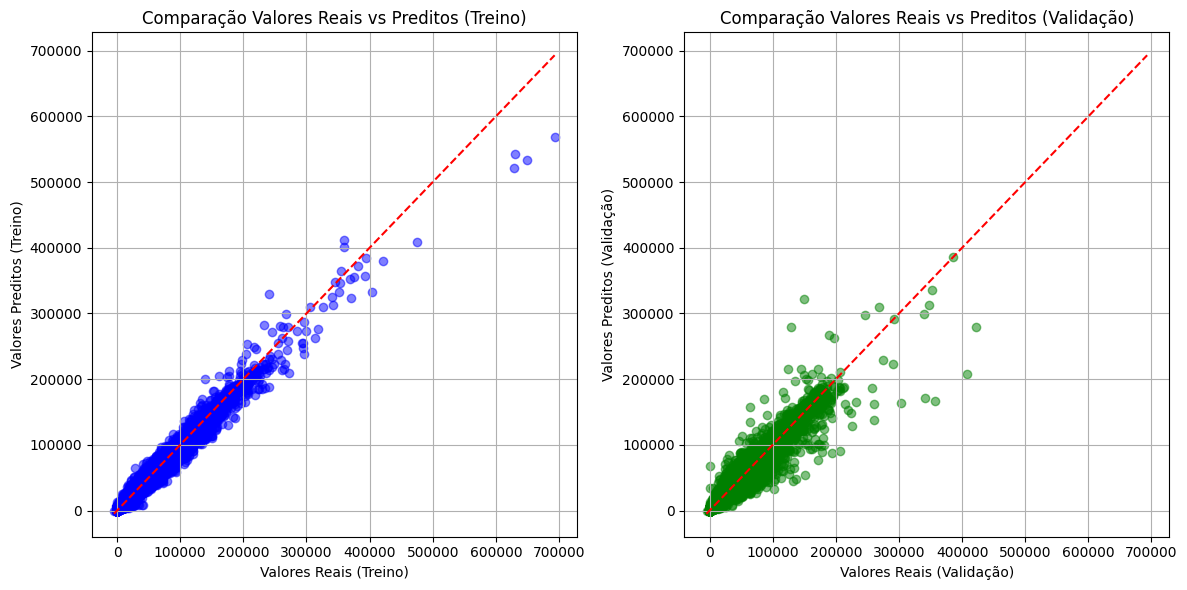

In [8]:
# Função para calcular RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Função para calcular MAE
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Previsões no conjunto de treino
y_train_pred = best_rf_model.predict(X_train)

weights = X_val['Feriado'].apply(lambda x: 5 if x else 1)

# Cálculo do RMSE e MAE no conjunto de treino
train_rmse = rmse(y_train, y_train_pred)
train_mae = mae(y_train, y_train_pred)

# Cálculo do RMSE e MAE no conjunto de validação
val_rmse = rmse(y_val, y_pred_rf)
val_mae = mae(y_val, y_pred_rf)

# Exibindo os resultados
print(f"RMSE no conjunto de treino: {train_rmse}")
print(f"MAE no conjunto de treino: {train_mae}")
print(60 * '-')
print(f"RMSE no conjunto de validação: {val_rmse}")
print(f"MAE no conjunto de validação: {val_mae}")

# Visualização dos resultados
plt.figure(figsize=(12, 6))

# Gráfico para o conjunto de treino
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Valores Reais (Treino)')
plt.ylabel('Valores Preditos (Treino)')
plt.title('Comparação Valores Reais vs Preditos (Treino)')
plt.grid(True)

# Gráfico para o conjunto de validação
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_rf, alpha=0.5, color='green')
# plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Valores Reais (Validação)')
plt.ylabel('Valores Preditos (Validação)')
plt.title('Comparação Valores Reais vs Preditos (Validação)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
# RandomForestClassifier
rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_val)

# ExtraTreesClassifier
et_clf = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
et_pred = et_clf.predict(X_val)

# Cálculo das métricas de regressão
rf_rmse = mean_squared_error(y_val, rf_pred)  
rf_mae = mean_absolute_error(y_val, rf_pred)  
rf_r2 = r2_score(y_val, rf_pred)  

# Cálculo das métricas de regressão
et_rmse = mean_squared_error(y_val, et_pred)  
et_mae = mean_absolute_error(y_val, et_pred)  
et_r2 = r2_score(y_val, et_pred)  

print(60 * '-')
print(f"RMSE do Random Forest Regressor: {rf_rmse}")
print(f"MAE do Random Forest Regressor: {rf_mae}")
print(f"R^2 score do Random Forest Regressor: {rf_r2}")
print(60 * '-')
print(f"RMSE do Extra Trees Regressor: {et_rmse}")
print(f"MAE do Extra Trees Regressor: {et_mae}")
print(f"R^2 score do Extra Trees Regressor: {et_r2}")


------------------------------------------------------------
RMSE do Random Forest Regressor: 18154336.90604461
MAE do Random Forest Regressor: 1614.63852731219
R^2 score do Random Forest Regressor: 0.9651862957786795
------------------------------------------------------------
RMSE do Extra Trees Regressor: 19446065.854231074
MAE do Extra Trees Regressor: 1669.3903228301347
R^2 score do Extra Trees Regressor: 0.9627092089112816
